In [172]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
stock = 'GOOGL'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [174]:
price = data['Close']
price

Date
2010-01-04     15.684434
2010-01-05     15.615365
2010-01-06     15.221722
2010-01-07     14.867367
2010-01-08     15.065566
                 ...    
2023-05-08    107.769997
2023-05-09    107.349998
2023-05-10    111.750000
2023-05-11    116.570000
2023-05-12    117.510002
Name: Close, Length: 3363, dtype: float64

<Axes: xlabel='Date'>

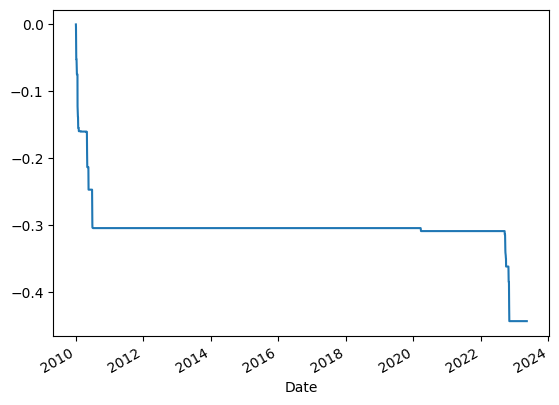

In [175]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()


In [176]:
print(f"Maximum Drawdown is: {mdd[-1]*100} %")

Maximum Drawdown is: -44.32005141440533 %


In [177]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        , -0.00440366, -0.02520872, ...,  0.04098744,
        0.04313199,  0.00806385])

In [178]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 0.99559634, 0.97049863, ..., 7.12489851, 7.43220955,
       7.49214174])

In [179]:
print(f"Cumulative return is {cumulative_ret[-1]*100}%")

Cumulative return is 749.2141737960739%


In [180]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31    0.087429
2012-12-31    0.095185
2013-12-31    0.584311
2014-12-31   -0.053940
2015-12-31    0.466118
2016-12-31    0.018560
2017-12-31    0.329295
2018-12-31   -0.008012
2019-12-31    0.281762
2020-12-31    0.308536
2021-12-31    0.652958
2022-12-31   -0.390896
2023-12-31    0.331860
Freq: A-DEC, Name: Close, dtype: float64

In [181]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28   -0.005925
2010-03-31    0.076538
2010-04-30   -0.073036
2010-05-31   -0.076222
                ...   
2023-01-31    0.120254
2023-02-28   -0.088830
2023-03-31    0.151788
2023-04-30    0.034802
2023-05-31    0.094746
Freq: M, Name: Close, Length: 161, dtype: float64

In [182]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 20.793582076296975%


In [183]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 22.09632574377977


In [184]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-02-28   -0.005925
2010-04-30   -0.073036
2010-05-31   -0.076222
2010-06-30   -0.083767
2010-08-31   -0.071837
                ...   
2022-08-31   -0.069635
2022-09-30   -0.116152
2022-10-31   -0.011918
2022-12-31   -0.126349
2023-02-28   -0.088830
Name: Close, Length: 64, dtype: float64

In [185]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 41.18797715631384
